<a href="https://colab.research.google.com/github/TudorStadiu/SHSG-G4/blob/master/Roomio_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Roomio machine learning

Firstly, we import the relevant modules to perform our operations.

In [1]:
import pandas as pd

Firstly, we import the relevant data collected on the thermostat sensors placed in the rooms in order to test our machine learning.


In [2]:
url = 'https://raw.githubusercontent.com/TudorStadiu/SHSG-G4/master/file.csv'

We store the data in a Pandas dataframe in order to have a better understanding.

In [3]:
roomio_dataframe = pd.read_csv(url)

We display the dataframe.

In [4]:
roomio_dataframe

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


The function describe() is used to visualize the data.

In [5]:
roomio_dataframe.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


corr() is used to find the pairwise correlation of all columns in the dataframe

In [6]:
roomio_dataframe.corr()['Occupancy']

Temperature      0.705784
Humidity         0.610764
Light            0.927949
CO2              0.768030
HumidityRatio    0.700330
Occupancy        1.000000
Name: Occupancy, dtype: float64

In our analysis, the occupancy column is the dependant variable and the temperature, humidity, light, CO2 and humidity ratio are the independant variables. Therefore, we set the column Occupancy as y and the rest as x. (axis = 1 refers to the column rather than the index)

In [7]:
y = roomio_dataframe['Occupancy']
X = roomio_dataframe.drop('Occupancy', axis = 1)

In order to test provide customers with the highest accuracy possible, we run our code using 3 different machine learning approach. The first one being tested in the linear regression, then we assess the decision tree model and lastly the random forest approach.

In order to run the linear regression, we need to import the relevant modules.

'train_test_split' splits arrays or matrices into random train and test subsets. We use 80% of data for training and 20% for testing using 'test_size'. 'random_state' ensures that randomly selected data in train and test will not change every time we run the code. 

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

Moreover, we import relevant function for the linear regression



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

We create an instance of the class logistic Regression called 'logit'.

In [10]:
logit =LogisticRegression()

The method 'fit()' is used to fit the model with our training data. Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.

In [11]:
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that we used our model to test the test_x data and store our prediction in a variable called 'logit_pred_y'.

In [12]:
logit_pred_y = logit.predict(x_test)

We compare our results with the actual results and obtain the probability of finding if the room is occupied or not using the linear regression.

In [13]:
logit_results = accuracy_score(y_test,logit_pred_y)
logit_results

0.9774859287054409

The second approach we used is called 'decision tree'.

First, we import the relevant modules.

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Because we already categorized the independant and dependant variables we can reuse these variables. 

The second step is to create an instance of the class 'DecisionTreeClassifier()' and call it 'dtc'.

In [15]:
decision_tree = DecisionTreeClassifier()

Third, we create an image file which shows the generated decision tree. That file is downloaded to the local computer. Otherwise the resulting quality would be too bad.

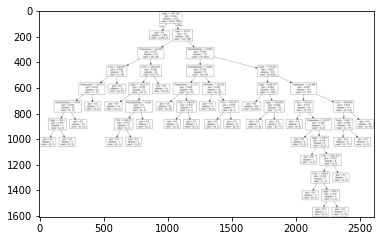

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from google.colab import files

data = tree.export_graphviz(decision_tree, out_file=None, feature_names= ['Temperature', 'Humidity', 'Light','CO2', 'HumidityRatio'])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()
files.download("mydecisiontree.png")

The class also has a method 'fit()' that fit the model with our training data.

We also use the method 'predict()' to test our model and store the results in the variable 'dtree_pred_y'.

In [16]:
decision_tree.fit(x_train, y_train)
dtree_pred_y = decision_tree.predict(x_test)



Lasty, we can assess our results with the actual results and display the probability of finding if a room is occupied using the decision tree approach.

In [ ]:
dtree_results = accuracy_score(y_test,dtree_pred_y)
dtree_results

0.9812382739212008

The last approach is called random forest.

Firstly, we import the relevant module.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

We create an instance of the class 'RandomForestClassifier()' called 'randforest'.

In [ ]:
randforest=RandomForestClassifier()

As with the other approaches, we use the methods 'fit()' to fit the model with our training data before using the function predict to test our model with the testing data.

In [ ]:
randforest.fit(x_train,y_train)
randforest_pred_y = randforest.predict(x_test)

Lasty, we compare our results with the actual results.

In [ ]:
randforest_results = accuracy_score(y_test,randforest_pred_y)
randforest_results

0.9831144465290806

Based on the results of the 3 approaches, it seems that the random forest model is slighlty better than the two other approaches to predict the occupancy of a room based on the temperature, humidity, light, CO2 and humidity ratio.